In [1]:
import numpy as np
from statistics import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
reductions = np.linspace(0.0, 1.0, 101)

In [22]:
cs = [Classifier(r, 3.0, inputs = [1000, 100]) for r in reductions]

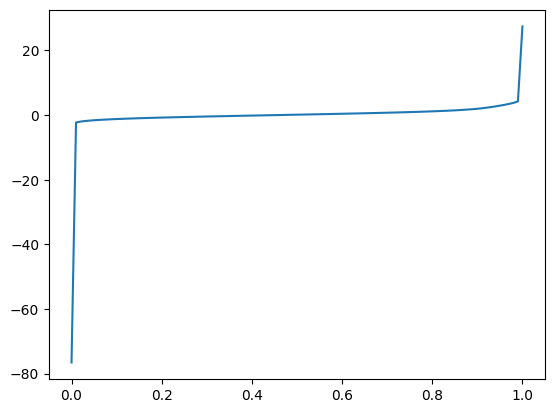

In [23]:
plt.plot(reductions, [c.threshold for c in cs])

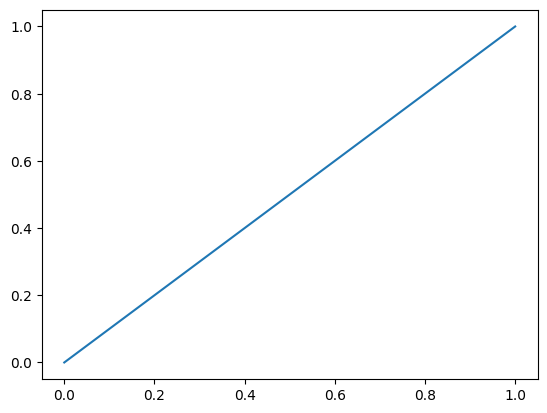

In [24]:
plt.plot(reductions, [c.scores(c.threshold) for c in cs])

In [25]:
cs[0].reduction

0.0

In [26]:
cs[0].error_matrix

array([[0., 0.],
       [1., 1.]])

In [27]:
a = cs[0](np.array([1000, 50]))

In [28]:
get_passed(a)

array([1000.,   50.])

In [29]:
get_rejected(a)

array([0., 0.])

In [30]:
cs[-1].reduction

1.0

In [31]:
cs[1].error_matrix

array([[1.09999935e-02, 6.10352132e-08],
       [9.89000007e-01, 9.99999939e-01]])

In [32]:
b = cs[-1](np.array([1000, 50]))

In [33]:
get_passed(b)

array([0., 0.])

In [34]:
get_rejected(b)

array([1000.,   50.])

In [35]:
mats = np.stack([c.error_matrix for c in cs])

In [36]:
mats.shape

(101, 2, 2)

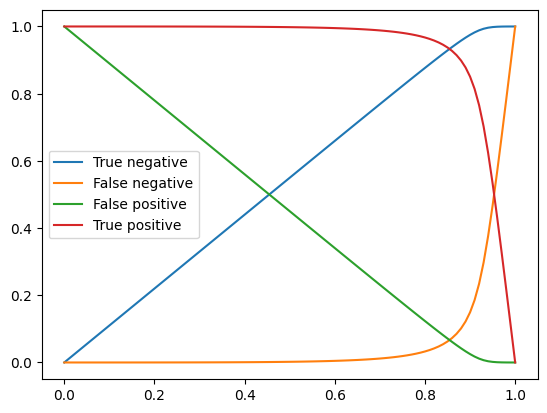

In [37]:
plt.plot(reductions, mats[:,0,0], label="True negative")
plt.plot(reductions, mats[:,0,1], label="False negative")
plt.plot(reductions, mats[:,1,0], label="False positive")
plt.plot(reductions, mats[:,1,1], label="True positive")
plt.legend()

In [38]:
from metrics import *

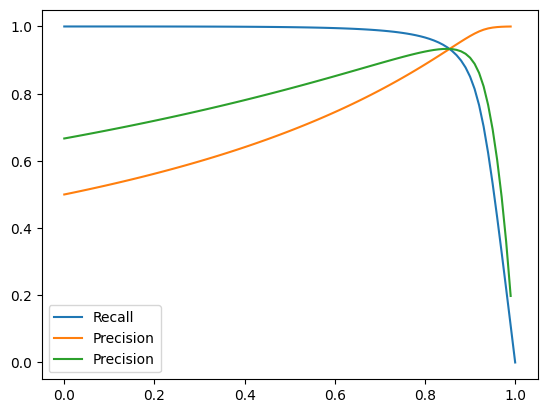

In [39]:
plt.plot(reductions, [recall(mats[i,:,:]) for i in range(mats.shape[0])], label="Recall")
plt.plot(reductions, [precision(mats[i,:,:]) for i in range(mats.shape[0])], label="Precision")
plt.plot(reductions, [f1_score(mats[i,:,:]) for i in range(mats.shape[0])], label="Precision")
plt.legend()